In [1]:
import re,os
import statsmodels.api as sm
import pandas as pd

In [5]:
df = pd.read_csv("data/merged_gme.csv")

In [6]:
display(df)

,Unnamed: 0,timestamp,open,high,low,close,volume,change,Unnamed: 0.1,Mention Count,Mean Sent Score,Scores StdDev
0,0,2022-01-31,97.870,109.8199,97.8600,108.93,3499273,11.060,2022-1-31,11,-0.043973,0.298081
1,1,2022-02-01,113.010,116.6500,108.2649,112.60,3461877,-0.410,2022-2-1,38,0.051024,0.259325
2,2,2022-02-02,110.350,111.8599,98.0600,100.04,3279135,-10.310,2022-2-2,36,-0.039461,0.477875
3,3,2022-02-03,101.500,106.9400,97.7100,99.23,2677519,-2.270,2022-2-3,1,0.000000,0.000000
4,4,2022-02-04,99.010,104.0000,95.0800,102.34,1906791,3.330,2022-2-4,16,-0.064706,0.437461
5,5,2022-02-07,102.990,105.3849,98.7700,102.34,1759360,-0.650,2022-2-5,21,-0.050090,0.304355
6,6,2022-02-08,101.755,117.6717,100.5500,115.60,4959906,13.845,2022-2-6,32,-0.066828,0.422273
7,7,2022-02-09,114.090,124.7100,113.0000,124.29,3866895,10.200,2022-2-9,13,-0.027869,0.290657
8,8,2022-02-10,117.950,131.7800,116.0000,122.47,3706537,4.520,2022-2-10,7,0.193457,0.256715
9,9,2022-02-11,122.480,129.8668,120.7706,124.25,2824777,1.770,2022-2-11,1,0.000000,0.000000


In [7]:
sm.tsa.stattools.ccf(df['high'], df['Mean Sent Score'], adjusted=False)

array([-0.05830487, -0.09525199, -0.06822821, -0.06899111, -0.03962238,
        0.00544196, -0.14346188, -0.17161216, -0.35409316, -0.02489493,
        0.0451656 ,  0.05320204,  0.17712175,  0.18983049,  0.16587656,
        0.18678204,  0.11475493,  0.14448743,  0.21758327, -0.14430394,
        0.01332976, -0.08602339, -0.0476706 , -0.00554838, -0.09923122,
       -0.21989338, -0.00242834,  0.00675708, -0.01184673,  0.11923824,
        0.04999303,  0.07287089, -0.04370498, -0.05467363, -0.03625837,
       -0.02200781, -0.00419914, -0.0071869 ,  0.01895848, -0.01893407])

In [8]:
sm.tsa.stattools.ccf(df['low'], df['Mean Sent Score'], adjusted=False)

array([-0.05696131, -0.13834526, -0.07505901, -0.11434501,  0.02319701,
       -0.00234344, -0.12209859, -0.25152202, -0.38675421, -0.11428066,
        0.04932254,  0.08645169,  0.10280835,  0.18158643,  0.05920894,
        0.22985568,  0.10681675,  0.16608582,  0.16592944, -0.08240295,
        0.00060922, -0.03113201, -0.0128841 , -0.02785736, -0.06190239,
       -0.19146788, -0.00890871, -0.01715732,  0.00997065,  0.11535774,
        0.05637645,  0.06171932, -0.04241257, -0.03834434, -0.03636946,
       -0.01196823, -0.00270428, -0.0033764 ,  0.01177341, -0.01395444])

In [9]:
sm.tsa.stattools.ccf(df['high'], df['Scores StdDev'], adjusted=False)

array([ 0.05670398,  0.07542857,  0.14963119,  0.03217726,  0.05369289,
        0.00361069, -0.06037944, -0.04896114, -0.03038584, -0.07383882,
       -0.05627804,  0.15902422, -0.01809074,  0.01730049,  0.13755913,
       -0.24739844, -0.09063683,  0.13435989,  0.09309223,  0.21765047,
        0.23190515,  0.19847178,  0.08485104, -0.07323707, -0.08671833,
       -0.0219996 , -0.04548577, -0.2225495 , -0.07220475, -0.11766666,
       -0.13565568,  0.02891105,  0.03050485,  0.0366633 ,  0.03089195,
        0.01320527, -0.10361205,  0.0809354 , -0.01755185,  0.00109997])

In [10]:
sm.tsa.stattools.ccf(df['low'], df['Scores StdDev'], adjusted=False)

array([ 0.01481093,  0.09805898,  0.10334409,  0.03508464, -0.02450795,
        0.00556056, -0.06459564, -0.05831388, -0.03985332, -0.0374279 ,
       -0.10902654,  0.06905606,  0.03886897, -0.00307261,  0.13193074,
       -0.21325618, -0.08115966,  0.08614837,  0.0870161 ,  0.23566361,
        0.24353845,  0.23289843,  0.04881314, -0.0255006 , -0.04087043,
       -0.00347717,  0.0066722 , -0.17989412, -0.07336961, -0.13545992,
       -0.07972724, -0.00205527,  0.06747945,  0.00959729,  0.02418854,
       -0.00055993, -0.0672781 ,  0.05762738, -0.01280799,  0.00081068])

In [11]:
sm.tsa.stattools.ccf(df['high'], df['Mention Count'], adjusted=False)

array([ 0.07621409, -0.07113279,  0.0340857 ,  0.15368827,  0.25052711,
        0.21882834,  0.37370081,  0.18481877,  0.03825039,  0.0150997 ,
       -0.02350572,  0.00072063, -0.078492  , -0.12582038, -0.10704631,
       -0.10992227,  0.01654301,  0.13244678,  0.07671427,  0.13369054,
        0.28797793, -0.05793059, -0.03018286, -0.08002273, -0.14587693,
       -0.15574199, -0.12107805, -0.29415338, -0.28898121, -0.20430329,
       -0.14638927, -0.05786916,  0.00356256,  0.10261327,  0.129239  ,
        0.10773784,  0.06073642,  0.24305556,  0.163164  , -0.0095532 ])

In [12]:
sm.tsa.stattools.ccf(df['low'], df['Mention Count'], adjusted=False)

array([-0.03308919, -0.08473811, -0.03226169,  0.16223797,  0.22724518,
        0.20101248,  0.34433264,  0.22290692,  0.13928942,  0.09545147,
        0.0114964 ,  0.00462519, -0.01091564, -0.02630329, -0.05010317,
       -0.04395772, -0.04138389,  0.17256642,  0.12700954,  0.19748938,
        0.2709799 ,  0.04260738, -0.03598005, -0.09275514, -0.09820116,
       -0.09794253, -0.09283191, -0.29325541, -0.3021192 , -0.24120821,
       -0.14233391, -0.08350247, -0.00986054,  0.02982335,  0.0458534 ,
        0.08486303,  0.07589318,  0.19794024,  0.11914259, -0.00704072])

In [27]:
df1=df
df1=df.drop(['Unnamed: 0','timestamp', 'open','low','close','change','volume'], axis = 1)
display(df1)
df2=df.drop(['Unnamed: 0','timestamp', 'open','low','close','high','volume'], axis = 1)

,high,Unnamed: 0.1,Mention Count,Mean Sent Score,Scores StdDev
0,109.8199,2022-1-31,11,-0.043973,0.298081
1,116.6500,2022-2-1,38,0.051024,0.259325
2,111.8599,2022-2-2,36,-0.039461,0.477875
3,106.9400,2022-2-3,1,0.000000,0.000000
4,104.0000,2022-2-4,16,-0.064706,0.437461
5,105.3849,2022-2-5,21,-0.050090,0.304355
6,117.6717,2022-2-6,32,-0.066828,0.422273
7,124.7100,2022-2-9,13,-0.027869,0.290657
8,131.7800,2022-2-10,7,0.193457,0.256715
9,129.8668,2022-2-11,1,0.000000,0.000000


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
matrix = df1.corr().round(2)
print(matrix)

                 high  Mention Count  Mean Sent Score  Scores StdDev
high             1.00           0.08            -0.06           0.06
Mention Count    0.08           1.00             0.05           0.33
Mean Sent Score -0.06           0.05             1.00          -0.21
Scores StdDev    0.06           0.33            -0.21           1.00


AttributeError: 'Figure' object has no attribute 'saveplot'

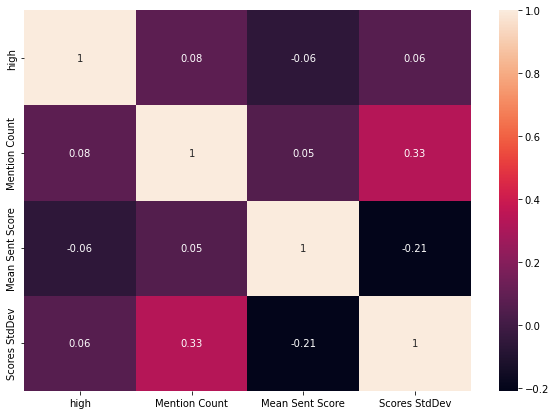

In [35]:
fig = plt.figure(figsize=(10,7))
sns.heatmap(matrix, annot=True)
fig.saveplot('highprice_heatmap.jpg', bbox_inches='tight', dpi=150) 
plt.show()

                 change  Mention Count  Mean Sent Score  Scores StdDev
change             1.00           0.33             0.03           0.28
Mention Count      0.33           1.00             0.05           0.33
Mean Sent Score    0.03           0.05             1.00          -0.21
Scores StdDev      0.28           0.33            -0.21           1.00


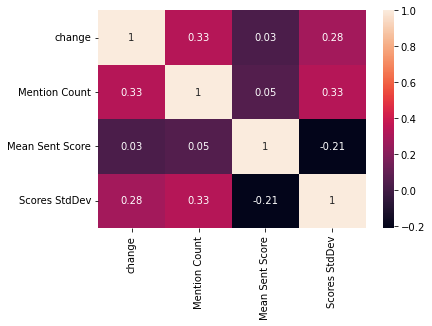

In [28]:
matrix = df2.corr().round(2)
print(matrix)
sns.heatmap(matrix, annot=True)
plt.show()